In [1]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS575/Lab4/airline-passengers.csv', index_col='Month')
dataset.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


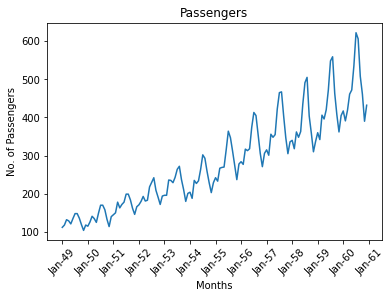

In [3]:
plt.plot(dataset['Passengers'])
plt.xticks([i for i in range(0,145,12)],
           ['Jan-49','Jan-50','Jan-51','Jan-52','Jan-53','Jan-54','Jan-55','Jan-56','Jan-57','Jan-58','Jan-59','Jan-60','Jan-61'],
           rotation=45)
plt.xlabel("Months")
plt.ylabel("No. of Passengers")
plt.title('Passengers')
plt.show()

In [4]:
dataset['meanRoll'] = dataset['Passengers'].rolling(5).mean()
dataset['stdRoll'] = dataset['Passengers'].rolling(5).std()
dataset.head(10)

,Passengers,meanRoll,stdRoll
Month,,,
1949-01,112,NaN,NaN
1949-02,118,NaN,NaN
1949-03,132,NaN,NaN
1949-04,129,NaN,NaN
1949-05,121,122.4,8.142481
1949-06,135,127.0,7.245688
1949-07,148,133.0,9.874209
1949-08,148,136.2,11.861703
1949-09,136,137.6,11.193748


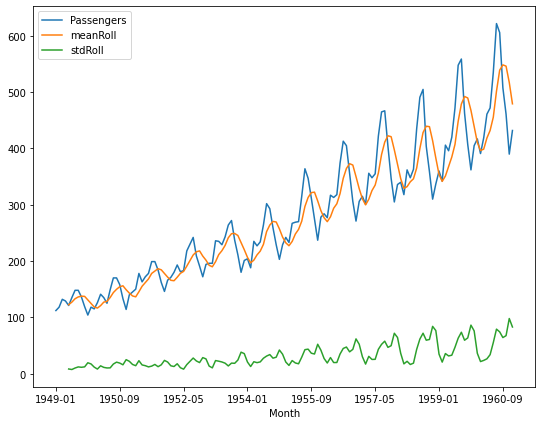

In [5]:
dataset.plot(figsize=[9,7])
dataset.drop(dataset.columns[-2:],axis=1,inplace=True)

# Stationary

> 'Stationarity’ is one of the most important concepts you will come across when working with time series data. A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.

## Methods to Check Stationarity
> The next step is to determine whether a given series is stationary or not and deal with it accordingly. This section looks at some common methods which we can use to perform this check.

### Visual test
>Consider the plots we used in the previous section. We were able to identify the series in which mean and variance were changing with time, simply by looking at each plot. Similarly, we can plot the data and determine if the properties of the series are changing with time or not. Although its very clear that we have a trend (varying mean) in the above series, this visual approach might not always give accurate results. It is better to confirm the observations using some statistical tests.
### Statistical test
Instead of going for the visual test, we can use statistical tests like the unit root stationary tests. Unit root indicates that the statistical properties of a given series are not constant with time, which is the condition for stationary time series.
These are the two of the most commonly used unit root stationary tests:


### 1. ADF (Augmented Dickey Fuller) Test

The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

> **Null Hypothesis:** The series has a unit root (value of a =1)

> **Alternate Hypothesis:** The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary

**Test for stationarity:** If the test statistic is less than the critical value, we can reject the null hypothesis. When the test statistic is greater than the critical value, we fail to reject the null hypothesis.

In [6]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = dataset[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Passengers')

Results of Dickey-Fuller Test for  Passengers 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


### 2. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.

> **Null Hypothesis:** The process is trend stationary.
    
> **Alternate Hypothesis:** The series has a unit root (series is not stationary).
    
**Test for stationarity** If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). For the air passenger data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.
I usually perform both the statistical tests before I prepare a model for my time series data. It once happened that both the tests showed contradictory results. One of the tests showed that the series is stationary while the other showed that the series is not! I got stuck at this part for hours, trying to figure out how is this possible. As it turns out, there are more than one type of stationarity.
So in summary, the ADF test has an alternate hypothesis of linear or difference stationary, while the KPSS test identifies trend-stationarity in a series.


In [7]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(atr):
    timeseries = dataset[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test('Passengers')

Results of KPSS Test for  Passengers
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


## Types of Stationarity

Let us understand the different types of stationarities and how to interpret the results of the above tests.

> **Strict Stationary:** A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.

> **Trend Stationary:** A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.

> **Difference Stationary:** A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.

> Case 1: Both tests conclude that the series is not stationary -> series is not stationary

> Case 2: Both tests conclude that the series is stationary -> series is stationary

> Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary

> Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary


## Making a Time Series Stationary

Now that we are familiar with the concept of stationarity and its different types, we can finally move on to actually making our series stationary. Always keep in mind that in order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first.

**Differencing**
In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

$$\Large y^{'}_{t} = y_t - y_{t-1} $$

where $y_t$ is the value at a time t

**Seasonal Differencing**
In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

$$\Large y^{'}_{t} = y_t - y_{t-n} $$

**Transformation**
Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform. Let’s do a quick log transform and differencing on our dataset.

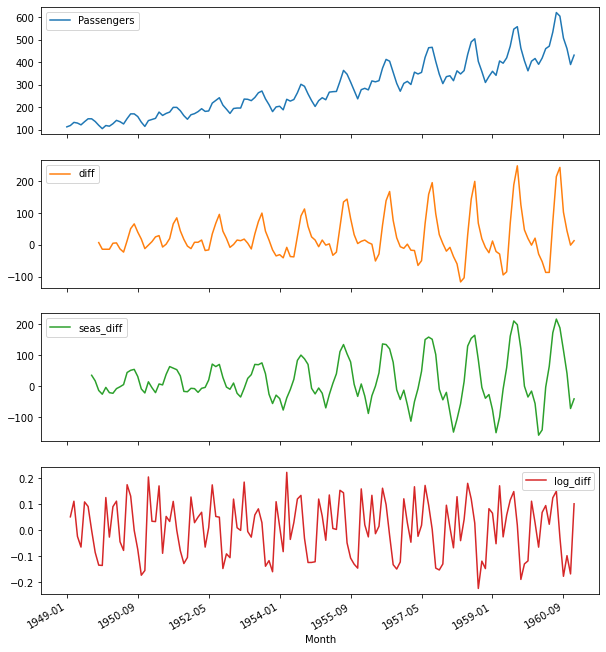

In [65]:
# Differencing
dataset['diff'] = dataset['Passengers'].diff(periods=9)

# Seasonal Differencing
dataset['seas_diff'] = dataset['Passengers'].diff(periods=7)

# Transformation (here we use log transformation)
dataset_log = np.log(dataset['Passengers'])
dataset['log_diff'] = dataset_log.diff(periods=1)

dataset.plot(subplots=True, figsize=(10,12))
plt.show()

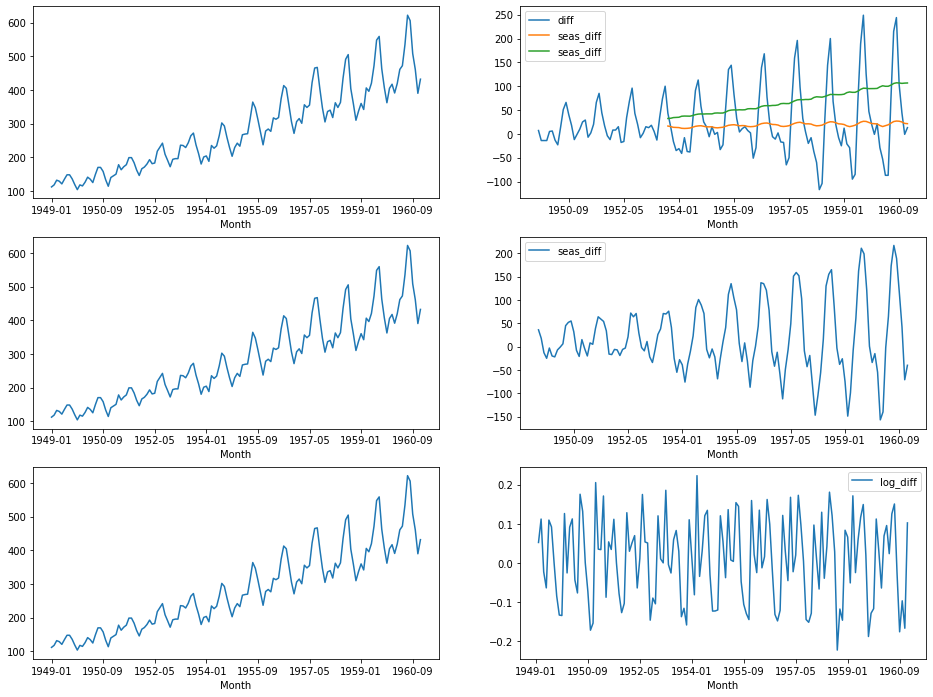

In [70]:
# visualize
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
dataset['Passengers'].plot()
plt.subplot(3,2,2)
dataset['diff'].plot()
plt.legend()

plt.subplot(3,2,3)
dataset['Passengers'].plot()
plt.subplot(3,2,4)
dataset['seas_diff'].plot()
plt.legend()

plt.subplot(3,2,5)
dataset['Passengers'].plot()
plt.subplot(3,2,6)
dataset['log_diff'].plot()
plt.legend()

plt.show()

## Test

In [10]:
adf_test('Passengers')
print("\n")
kpss_test('Passengers')

Results of Dickey-Fuller Test for  Passengers 

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Results of KPSS Test for  Passengers
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [11]:
adf_test('diff')
print("\n")
kpss_test('diff')

Results of Dickey-Fuller Test for  diff 

Test Statistic                  -3.561427
p-value                          0.006543
#Lags Used                      13.000000
Number of Observations Used    121.000000
Critical Value (1%)             -3.485585
Critical Value (5%)             -2.885739
Critical Value (10%)            -2.579676
dtype: float64


Results of KPSS Test for  diff
Test Statistic            0.349896
p-value                   0.098752
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [12]:
adf_test('seas_diff')
print("\n")
kpss_test('seas_diff')

Results of Dickey-Fuller Test for  seas_diff 

Test Statistic                  -3.380110
p-value                          0.011656
#Lags Used                      13.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


Results of KPSS Test for  seas_diff
Test Statistic            0.274626
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [13]:
adf_test('log_diff')
print("\n")
kpss_test('log_diff')

Results of Dickey-Fuller Test for  log_diff 

Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


Results of KPSS Test for  log_diff
Test Statistic            0.101545
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


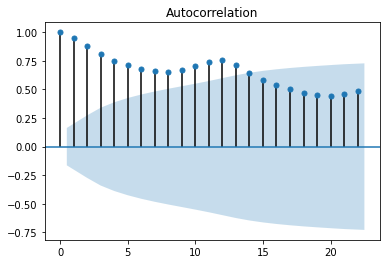

In [56]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset['Passengers'])
plt.show()

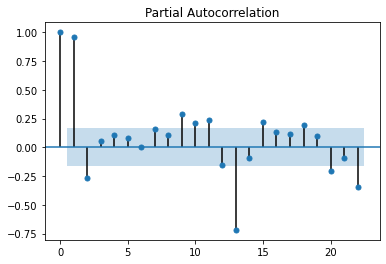

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dataset['Passengers'])
plt.show()

# AR example

In [16]:
#!pip install statsmodels==0.12.2 

173.98675922102396


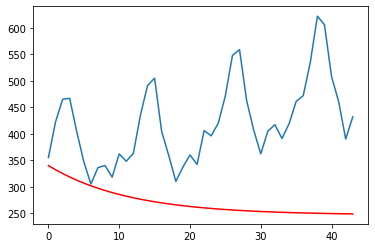

In [63]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# contrived dataset
data = dataset['Passengers'].to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]
# fit model
model = AutoReg(train, lags=2)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
print(rmse)
# plot results
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

0.04139469859500834


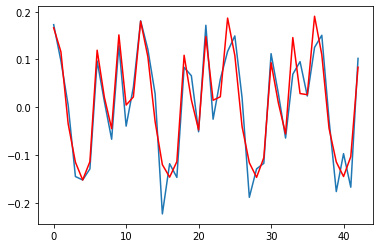

In [43]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# contrived dataset
data = dataset['log_diff'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]
# fit model
model = AutoReg(train, lags=32)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
print(rmse)
# plot results
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()

# MA example

45.36759384990318


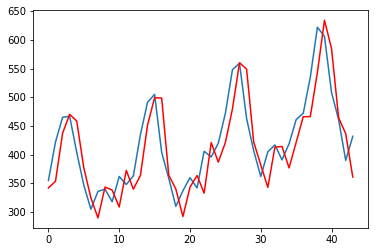

In [64]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# contrived dataset
data = dataset['Passengers'].dropna().to_numpy()
n = int(len(data)*0.7)
train, test = data[:n], data[n:]
# fit model
model = ARIMA(data, order=(2, 0, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(train), len(train)+len(test)-1)
rmse = sqrt(mean_squared_error(test, yhat))
print(rmse)
# plot results
plt.plot(test)
plt.plot(yhat, color='red')
plt.show()